In [46]:
# import packages needed
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np
import cv2
import imutils

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# def outliers(arr, m=2):
#     return arr[abs(arr - np.mean(arr)) < m * np.std(arr)]

class shape:
    def __init__(self, points, index, area, center):
        self.points, self.index, self.area, self.center = points, index, area, center

def findHSVColorRange(img, shapeArr, shapeIndex, kernel=3):
#     _blur_img = cv2.GaussianBlur(img, (kernel,kernel), 0)
#     _hsvImg = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
#     hH, sH, vH = 0, 0, 0
#     hL, sL, vL = 255, 255, 255
#     hArr = outliers(shapeArr[0:, 0:, 0:1])
#     sArr = outliers(shapeArr[0:, 0:, 1:2])
#     vArr = outliers(shapeArr[0:, 0:, 2:3])
#     for x in shapeArr:
#         if x.index == shapeIndex:
#             for i in x.points:
#                 j = _hsvImg[i[0]][i[1]]
#                 hH = j[0] if hH < j[0] else hH
#                 hL = j[0] if hL > j[0] else hL
#                 sH = j[1] if sH < j[1] else sH
#                 sL = j[1] if sL > j[1] else sL
#                 vH = j[2] if vH < j[2] else vH
#                 vL = j[2] if vL > j[2] else vL
#     print("lowerRange = np.array([%s, %s, %s])" % (hL, sL, vL))
#     print("upperRange = np.array([%s, %s, %s])" % (hH, sH, vH))
    try:
        _blur_img = cv2.GaussianBlur(img, (kernel,kernel), 0)
        _hsvImg = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
        hH, sH, vH = 0, 0, 0
        hL, sL, vL = 255, 255, 255
        for x in shapeArr:
            if x.index == shapeIndex:
                for i in x.points:
                    j = _hsvImg[i[0]][i[1]]
                    hH = j[0] if hH < j[0] else hH
                    hL = j[0] if hL > j[0] else hL
                    sH = j[1] if sH < j[1] else sH
                    sL = j[1] if sL > j[1] else sL
                    vH = j[2] if vH < j[2] else vH
                    vL = j[2] if vL > j[2] else vL
        print("lowerRange = np.array([%s, %s, %s])" % (hL, sL, vL))
        print("upperRange = np.array([%s, %s, %s])" % (hH, sH, vH))
    except:
        print("Input invalid")
    return "none"

def locateShapes(img, min_area_size, kernel=3, _lowerThresh=127, _upperThresh=255, output_text=True, debug=False):
    _img = mpimg.imread(img)
    _arr = []
    _image = _img.copy()
    
    _blur_img = cv2.GaussianBlur(_image, (kernel,kernel), 0)
    _hsv_img  = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    
    imgray = cv2.cvtColor(_hsv_img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, _lowerThresh, _upperThresh, 0)
    
    _contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    _contours = imutils.grab_contours(_contours)
       
    i = 0
    
    for _c in _contours:
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)
        
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX, _cY = 0, 0
            
        if (_area >= min_area_size):  
            _coords = []
            
            if debug:
                print("Index: ", str(i), "area: ", _area, "center: (", _cX,",", _cY,")")
                
            cv2.drawContours(_image, [_c], -1, (0, 255, 0), 2)
            
            shapedImg = cv2.fillPoly(np.zeros(_image.shape[0]*_image.shape[1]*3).reshape(_image.shape[0],_image.shape[1],3), [_c], color=(255,255,255))
            values = np.where(shapedImg == np.array([255,255,255]))
            _coord = 0
            while _coord < len(values[0]):
                _coords.append((values[0][_coord], values[1][_coord]))
                _coord+=3
            
            _arr.append(shape(_coords, i, _area, (_cX, _cY)))
    
            if output_text:
                cv2.putText(_image, str(i), (_cX-10, _cY+10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
            i+=1
    return _image, _arr

# def run(image, min_area_size, kernel=3, threshold=(127, 255), output_text=True, debug=False):

lowerRange = np.array([92, 56, 2])
upperRange = np.array([165, 255, 245])


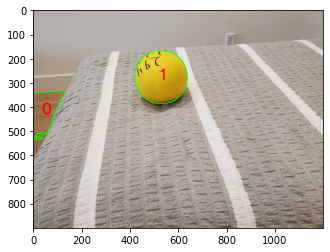

In [48]:
minArea = 600
kernel = 3
lowerThreshold = 127
upperThreshold = 255
OutputText = True
Debug = False

#character written on desired shape
INDEX = 1
#change image address (ex: powercell_ball.jpg)
imgAddress="powercell_ball_pattern.jpg"


img, arr = locateShapes(imgAddress, minArea, kernel, lowerThreshold, upperThreshold, OutputText, Debug)
findHSVColorRange(mpimg.imread(imgAddress), arr, INDEX)

plt.imshow(img)
plt.show()